# Student ID:
# Name:

# Lab 6: Training a Neural Network Model with Keras

## Content

1. Download and Process Dataset
2. Import Keras and build a Neural Network
3. Train the Network

## Download and Process Dataset

The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Let's download the data and read it into a pandas dataframe.

In [48]:
import pandas as pd
import numpy as np
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Let's check how many data points we have.

In [49]:
concrete_data.shape

(1030, 9)

Let's check the dataset for any missing values.

In [50]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [51]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Split data into features and target value

In [52]:
cols = concrete_data.columns
print(cols)

print(concrete_data[cols[0:8]])

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')
      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8

In [53]:
concrete_data_columns = concrete_data.columns

features = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column



Let's do a quick sanity check of the features and the target dataframes.

In [55]:
features.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [56]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.

In [57]:
features_norm = (features - features.mean()) / features.std()
features_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of features to n_feats since we will need this number when building our network.

In [58]:
n_feats = features_norm.shape[1]
n_feats

8

## Import Keras and build nerual network model

Let's import the Keras library and rest of the packages which we will need to build our regression model.

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Checking whether GPU has been used

In [60]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

#from keras import backend as K
#K.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15107370743737004933
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17576864418440967027
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


Let's define a function so that we can conveniently call it to create the regression model.

In [61]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(n_feats,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer='adam', loss='mse')
    return model

# build the model
model = regression_model()

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               900       
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 18,651
Trainable params: 18,651
Non-trainable params: 0
_________________________________________________________________


## Train the Network

Next, we will train and test the model at the same time using the fit method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.

In [63]:
# fit the model
history = model.fit(features_norm, target, validation_split=0.3, epochs=200, verbose=1, batch_size = 64)

Epoch 1/200
12/12 [==============================] - 2s 26ms/step - loss: 1651.7047 - val_loss: 1137.9960
Epoch 2/200
12/12 [==============================] - 0s 10ms/step - loss: 1444.6263 - val_loss: 867.8454
Epoch 3/200
12/12 [==============================] - 0s 9ms/step - loss: 896.8743 - val_loss: 324.3633
Epoch 4/200
12/12 [==============================] - 0s 9ms/step - loss: 340.1067 - val_loss: 260.4576
Epoch 5/200
12/12 [==============================] - 0s 10ms/step - loss: 272.1289 - val_loss: 197.9085
Epoch 6/200
12/12 [==============================] - 0s 10ms/step - loss: 236.5429 - val_loss: 183.5741
Epoch 7/200
12/12 [==============================] - 0s 9ms/step - loss: 212.3213 - val_loss: 185.8706
Epoch 8/200
12/12 [==============================] - 0s 8ms/step - loss: 200.9363 - val_loss: 183.8108
Epoch 9/200
12/12 [==============================] - 0s 10ms/step - loss: 191.4401 - val_loss: 190.7906
Epoch 10/200
12/12 [==============================] - 0s 10ms/ste

Visualize the model's training progress using the data stored in the history object.

In [64]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


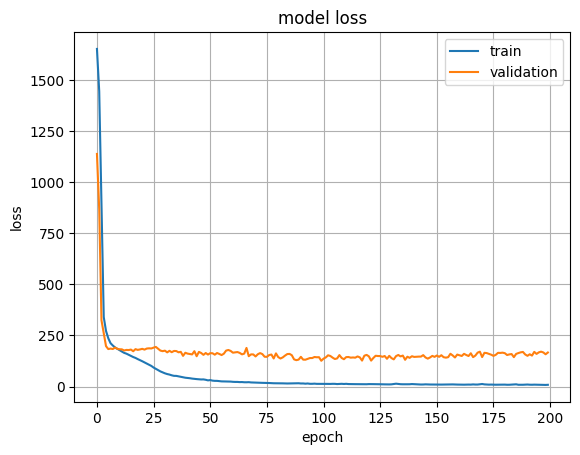

In [66]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid(True)
plt.show()

## Questions

1. What is the impact of dataset normalization on the model's performance?
2. Can you change the network to reduce the training loss?
3. Increase number of epochs and observe what impact it has on the training loss.
4. Do you see any problem with reduced training loss?
5. Use your best model to predict the concrete strength of an arbitrary data sample.

In [73]:
sample_data = [100, 30, 20, 300, 5, 500, 400, 10]
print(model.predict(np.array([sample_data])))

1/1 [==============================] - 0s 88ms/step
[[1504.4907]]
